In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.REAL_WORLD)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-19 11:03:17,762 - whar-datasets - INFO - Running DownloadingStep
2026-02-19 11:03:17,763 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-19 11:03:17,763 - whar-datasets - INFO - Hash is not up to date
2026-02-19 11:03:17,764 - whar-datasets - INFO - Downloading real_world
2026-02-19 11:06:47,646 - whar-datasets - INFO - Extracting real_world
2026-02-19 11:07:29,619 - whar-datasets - INFO - Running ParsingStep
2026-02-19 11:07:29,620 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-19 11:07:29,620 - whar-datasets - INFO - Hash is not up to date
2026-02-19 11:07:29,620 - whar-datasets - INFO - Checking download
2026-02-19 11:07:29,620 - whar-datasets - INFO - Download exists
2026-02-19 11:07:29,621 - whar-datasets - INFO - Parsing to common format
/Users/maxburzer/whar-datasets/src/whar_datasets/config/cfg_real_world.py:263: UserWarning: obj.round has no effect with datetime, timedelta, or period dtypes. Use obj.dt.round(...) instead.
  session_df

[########################################] | 100% Completed | 8.98 ss


2026-02-19 11:08:18,137 - whar-datasets - INFO - Common format validated.
2026-02-19 11:08:18,137 - whar-datasets - INFO - Compute windowing
2026-02-19 11:08:18,138 - whar-datasets - INFO - Selecting activities
2026-02-19 11:08:18,153 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 37.76 s


2026-02-19 11:08:56,690 - whar-datasets - INFO - Saving windowing
2026-02-19 11:09:17,933 - whar-datasets - INFO - Loading windowing
2026-02-19 11:09:17,954 - whar-datasets - INFO - activity_ids from 0 to 7
2026-02-19 11:09:17,955 - whar-datasets - INFO - subject_ids from 0 to 14


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 37168 9292 3453
subject_1 37328 9331 3254
subject_2 37078 9269 3566
subject_3 37644 9410 2859
subject_4 36852 9212 3849
subject_5 37223 9305 3385
subject_6 37801 9450 2662
subject_7 36872 9217 3824
subject_8 37114 9278 3521
subject_9 37296 9323 3294
subject_10 37170 9292 3451
subject_11 37266 9316 3331
subject_12 37188 9297 3428
subject_13 37888 9471 2554
subject_14 37145 9286 3482


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-19 11:09:18,061 - whar-datasets - INFO - Forcing recompute
2026-02-19 11:09:18,062 - whar-datasets - INFO - Running SamplingStep
2026-02-19 11:09:18,062 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-19 11:09:18,065 - whar-datasets - INFO - Hash is not up to date
2026-02-19 11:09:27,027 - whar-datasets - INFO - Computing samples
2026-02-19 11:09:27,028 - whar-datasets - INFO - Getting normalization parameters
2026-02-19 11:09:32,075 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 49.53 s


2026-02-19 11:10:30,588 - whar-datasets - INFO - Saving samples
2026-02-19 11:10:45,646 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

49913


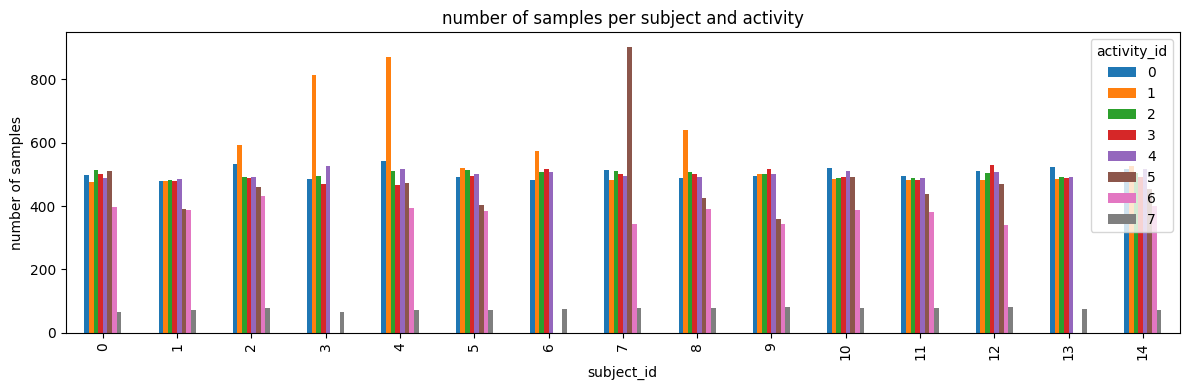

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 2, Subject: 12')

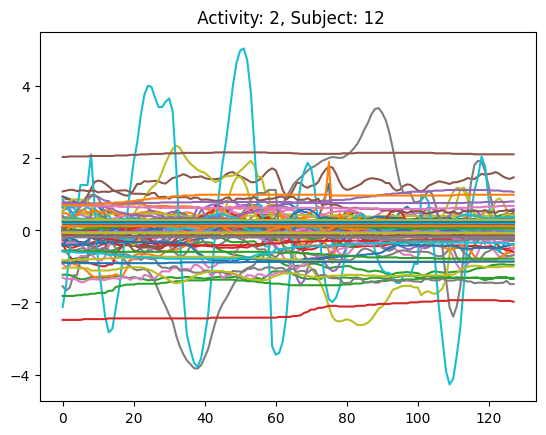

In [46]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")